In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def segment_skin_hsv(image_path):

    original_image = cv2.imread(image_path)
    if original_image is None:
        print(f"Error: Could not load image from {image_path}")
        return None

    hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

    lower_skin = np.array([0, 48, 50], dtype=np.uint8) 
    upper_skin = np.array([25, 255, 255], dtype=np.uint8) 

    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel) 
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel) 


    segmented_skin_image = cv2.bitwise_and(original_image, original_image, mask=skin_mask)

    return original_image, skin_mask, segmented_skin_image

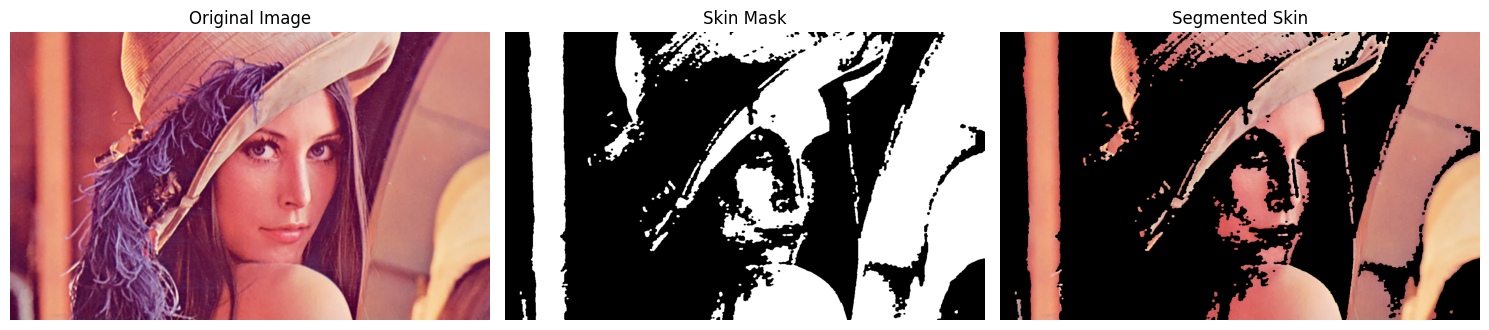

In [3]:
image_file = 'C:/Users/Lenovo/Desktop/lena.png'

result = segment_skin_hsv(image_file)

if result:
    original, mask, segmented = result

    
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Skin Mask')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Skin')
    plt.axis('off')

    plt.tight_layout()
    plt.show()